### Quantile Regression

<I>Quantile regression is a type of regression analysis used in statistics and econometrics. Whereas the method of least squares results in estimates that approximate the conditional mean of the response variable given certain values of the predictor variables, quantile regression aims at estimating either the conditional median or other quantiles of the response variable</I>. ([Wikipedia](https://en.wikipedia.org/wiki/Quantile_regression))

The most popular form of this regression is where we aim for median or 50th quantile. The problem then boils down to a convex optimization problem with the cost function in the form of [Least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations). I came across a question lately, asking to solve this problem for a special case of a linear function without any bias (fixed term). The question itself and the solution are discussed here. 

### Question

<B> Given two vectors X and Y in $R^n$, please implement an algorithm to compute a scalar beta that minimizes 
 
 $\| beta * X - Y \|_1    $
 
 and explain its complexity. </B>

This is a piecewise-linear optimization problem that arises in regression modeling, signal processing and some other applications. This optimization problem can be solved by Linear Programming methods. But since the question asks for not using any solver or known methods we will use simple properties of convex piecewise-linear nature of the problem to find the minimum. Here are the highlights of the approach used to solve this problem:

* The calculations are done in Python 2.7 using numpy package
* This problem doesn't have unique solution in some scenarios but the minimum norm can be found
* Since we know it is a convex piecewise-linear optimization we know that the minimum happens on Vertices
* We also know that for Least Absolute Deviations problem the answer converges to the median of roots (Vertices)
* The algorithm proposed calculates all the roots (Vertices) and finds the Vertex for which norm is the lowest
* Only vertices around median are processed (2 vertices if $n$ is even, 3 vertices if $n$ is odd)

Complexity of this algorithm is $nlog(n)$

This is because we have to sort the $n$ vertices to find the median

In [12]:
import numpy as np
from numpy.linalg import norm
from numpy.testing import assert_allclose
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def around_median(samples):
    samples = np.unique(samples) # sort unique elements
    length = len(samples)
    if length < 4:
        return samples
    else:
        if length % 2 == 0:  # even 
            return samples[length/2-1:length/2+1]
        else: # odd
            return samples[length/2-1:length/2+2]

def find_min(X, Y):
    current = np.inf
    best = None
    candidates = around_median(np.divide(Y, X))
    for item in candidates:
        L1 = norm(item*X-Y, ord=1)
        if L1 < current:
            best = item
            current = L1
    return best

Too test the proposed method we run the code for few test cases. If there is a optimum value it will be returned by find_min() otherwise it will return None. Don't throw empty vectors at it cuz None is what you will get!

#### Testcase 1

In this test we supply uniformly distributed random numbers with $n=11$ as an odd number

In [14]:
# Test Case1    ** Odd number of samples **
X1 = np.random.uniform(-100.0, 100, 11)
Y1 = np.random.uniform(-100.0, 100, 11)
optimum = find_min(X1, Y1)
lowest_norm = norm(optimum*X1-Y1, ord=1)
print "\n\nMinimum norm is ", lowest_norm, "Which happens for betha = ", optimum
try:
    expected = min([norm(item*X1-Y1, ord=1) for item in np.divide(Y1, X1)])
    assert_allclose(lowest_norm, expected, 0.01)
    print "\nPASSED: the answer has less than 1% error"
    print "{} is approximately equal to expected {}".format(lowest_norm, expected)

except AssertionError:
    print "\nFAILED: the error is more than 1%"
    print "found {} but was expecting {}".format(lowest_norm, expected)



Minimum norm is  627.026968432 Which happens for betha =  -0.232565869666

PASSED: the answer has less than 1% error
627.026968432 is approximately equal to expected 627.026968432


#### Testcase 2

In this test we supply uniformly distributed random numbers with $n=222$ as an even number

In [25]:
# Test Case2    ** Even number of samples **
X2 = np.random.uniform(-100.0, 100, 22)
Y2 = np.random.uniform(-100.0, 100, 22)
optimum = find_min(X2, Y2)
lowest_norm = norm(optimum*X2-Y2, ord=1)
print "\n\nMinimum norm is ", lowest_norm, "Which happens for betha = ", optimum
try:
    expected = min([norm(item*X2-Y2, ord=1) for item in np.divide(Y2, X2)])
    assert_allclose(lowest_norm, expected, 0.01)
    print "\nPASSED: the answer has less than 1% error"
    print "{} is approximately equal to expected {}".format(lowest_norm, expected)

except AssertionError:
    print "\nFAILED: the error is more than 1%"
    print "found {} but was expecting {}".format(lowest_norm, expected)



Minimum norm is  1169.09365168 Which happens for betha =  0.216295171636

PASSED: the answer has less than 1% error
1169.09365168 is approximately equal to expected 1169.09365168


#### Testcase 3

In this test we supply uniformly distributed random numbers with some roots that happen to be the same

In [16]:
# Test Case3    ** Some roots are equal**
X3 = np.random.uniform(-100.0, 100, 22)
X3 = np.append(X3, [1, 2])
Y3 = np.random.uniform(-100.0, 100, 22)
Y3 = np.append(Y3, [3, 6])
optimum = find_min(X3, Y3)
lowest_norm = norm(optimum*X3-Y3, ord=1)
print "\n\nMinimum norm is ", lowest_norm, "Which happens for betha = ", optimum
try:
    expected = min([norm(item*X3-Y3, ord=1) for item in np.divide(Y3, X3)])
    assert_allclose(lowest_norm, expected, 0.01)
    print "\nPASSED: the answer has less than 1% error"
    print "{} is approximately equal to expected {}".format(lowest_norm, expected)

except AssertionError:
    print "\nFAILED: the error is more than 1%"
    print "found {} but was expecting {}".format(lowest_norm, expected)



Minimum norm is  1090.52047116 Which happens for betha =  0.0956563372043

PASSED: the answer has less than 1% error
1090.52047116 is approximately equal to expected 1090.52047116


#### Testcase 4

In this test we try to see if we can survive Zero division. I used numpy divide method to make sure it will handle this. Let's see what happens!

In [23]:
# Test Case4    ** Zero Division **
X4 = np.random.uniform(-100.0, 100, 44)
X4 = np.append(X4, [0.0, 0.0])
Y4 = np.random.uniform(-100.0, 100, 46)
optimum = find_min(X4, Y4)
lowest_norm = norm(optimum*X4-Y4, ord=1)
print "\n\nMinimum norm is ", lowest_norm, "Which happens for betha = ", optimum
try:
    expected = min([norm(item*X4-Y4, ord=1) for item in np.divide(Y4, X4)])
    assert_allclose(lowest_norm, expected, 0.01)
    print "\nPASSED: the answer has less than 1% error"
    print "{} is approximately equal to expected {}".format(lowest_norm, expected)

except AssertionError:
    print "\nFAILED: the error is more than 1%"
    print "found {} but was expecting {}".format(lowest_norm, expected)



Minimum norm is  2356.87297815 Which happens for betha =  -0.0318223666051

PASSED: the answer has less than 1% error
2356.87297815 is approximately equal to expected 2340.0623818


c:\python27\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in divide
c:\python27\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in divide
c:\python27\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in multiply


We got the warning but it's nothing to worry about.

You might wonder what if we just find the derivitave of the function with respect to our independant variable and make it equal to zero. Let's call this Sardar's method (the name of the person who asked this question!). This method has the advantage of lower complexity (order n). But it doesn't converge to the answer very accurately. This can be explained with the fact that the function doesn't have derivitave in the vertices. We will plot the function to show what it means at the end. A few examples using this method. 

In [18]:
X = np.array([-1.0, 2.0, 3.0])
Y = np.array([4, 5, 6])

In [19]:
opt_beta = find_min(X, Y)
lowest_norm = norm(opt_beta*X-Y, ord=1)
opt_beta, lowest_norm

(2.0, 7.0)

In [20]:
sardar_beta = sum(Y*X)/sum(X**2)
sardar_norm = norm(sardar_beta*X-Y, ord=1)
sardar_beta, sardar_norm

(1.7142857142857142, 8.1428571428571441)

In [21]:

betas = np.arange(-2, 5, 0.01)
norms = []
for item in betas:
    norms.append(norm(item*X-Y, ord=1))

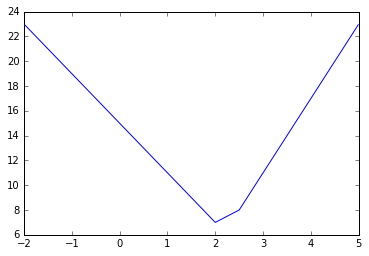

In [22]:
plt.plot(betas, norms)